In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [2]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1


In [3]:
my_data_dir = 'C:\\Users\\kaizi\\Desktop\\Deep Learning\\cell_images'

In [4]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['test', 'train']

In [5]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [6]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [7]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [8]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_163.png'

In [9]:
para_cell = train_path+'\\parasitized'+'\\C33P1thinF_IMG_20150619_114756a_cell_179.png'

In [10]:
para_img= imread(para_cell)

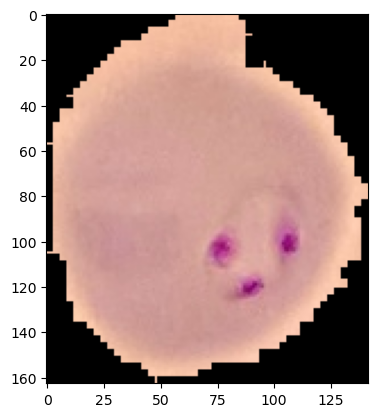

In [11]:
plt.imshow(para_img)

In [12]:
para_img.shape

(163, 142, 3)

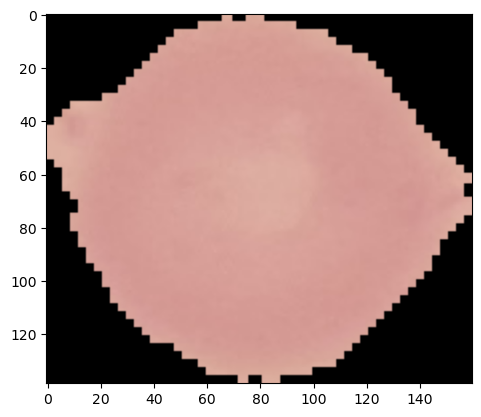

In [13]:
unifected_cell_path = train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

**Let's check how many images there are.**

In [14]:
len(os.listdir(train_path+'\\parasitized'))

11023

In [15]:
len(os.listdir(train_path+'\\uninfected'))

11023

**Let's find out the average dimensions of these images.**

In [16]:
unifected_cell.shape

(139, 160, 3)

In [17]:
para_img.shape

(163, 142, 3)

In [20]:
!pip install Pillow

In [21]:
# another way to write images information
from PIL import Image
import os

def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        return img.size

def check_image_dimensions(directory):
    # List all files in the directory
    files = os.listdir(directory)
    
    # Filter out only image files
    image_files = [file for file in files if file.endswith(('jpg', 'jpeg', 'png', 'gif'))]
    
    # Iterate through each image file and print its dimensions
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        dimensions = get_image_dimensions(image_path)
        print(f"Image: {image_file}, Dimensions: {dimensions}")

In [23]:
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

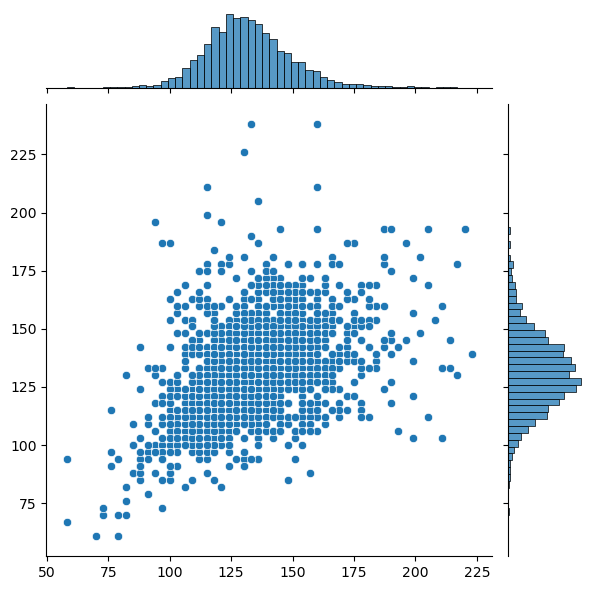

In [25]:
sns.jointplot(x=dim1, y=dim2, kind="scatter")
plt.show()

In [26]:
np.mean(dim1)

132.02140783744557

In [27]:
np.mean(dim2)

131.21044992743106

In [28]:
image_shape = (130,130,3)

In [29]:
# Preparing Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
# help(ImageDataGenerator)

In [34]:
unifected_cell.max(), para_img.max()  # already rescaled

(0.88235295, 1.0)

In [35]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # randomly shift the pic width by a max of 5%
                               height_shift_range=0.10, # randonly shift the pic height by a max of 5%
                               # rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

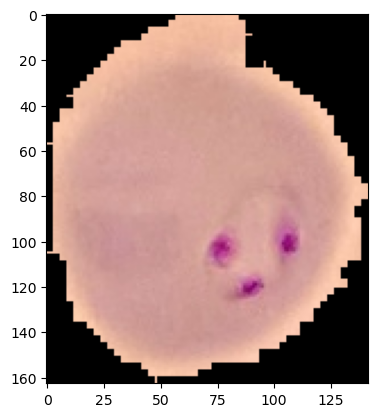

In [36]:
plt.imshow(para_img)

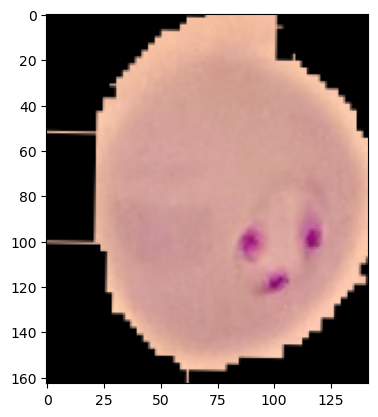

In [37]:
plt.imshow(image_gen.random_transform(para_img))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [38]:
image_gen.flow_from_directory(train_path)

Found 22046 images belonging to 2 classes.


In [39]:
image_gen.flow_from_directory(test_path)

Found 5512 images belonging to 2 classes.


# Creating the Model

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [41]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\kaizi\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

## Early Stopping

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Training the Model

In [45]:
# help(image_gen.flow_from_directory)

In [46]:
batch_size = 16 # choose a number power of 2, smaller batch size = long train time

In [47]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 22046 images belonging to 2 classes.


In [48]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 5512 images belonging to 2 classes.


In [49]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
results = model.fit(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 266s 192ms/step - accuracy: 0.5329 - loss: 2.5001 - val_accuracy: 0.5573 - val_loss: 0.6867
Epoch 2/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 160s 116ms/step - accuracy: 0.5760 - loss: 0.6822 - val_accuracy: 0.5951 - val_loss: 0.6755
Epoch 3/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 158s 115ms/step - accuracy: 0.5761 - loss: 0.6845 - val_accuracy: 0.6362 - val_loss: 0.6542
Epoch 4/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 159s 115ms/step - accuracy: 0.5990 - loss: 0.6798 - val_accuracy: 0.5887 - val_loss: 0.6671
Epoch 5/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 160s 116ms/step - accuracy: 0.6731 - loss: 0.5816 - val_accuracy: 0.9361 - val_loss: 0.1856
Epoch 6/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 160s 116ms/step - accuracy: 0.9332 - loss: 0.2127 - val_accuracy: 0.9374 - val_loss: 0.1752
Epoch 7/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 160s 116ms/step - accuracy: 0.9347 - loss: 0.2002 - val_accuracy: 0.9347 - val_loss: 0.1866
Epoch 8/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 160s 116ms/step - ac

In [54]:
# from tensorflow.keras.models import load_model
# model.save('malaria_detector.h5')

# Evaluating the Model

In [53]:
losses = pd.DataFrame(model.history.history)

<Axes: >

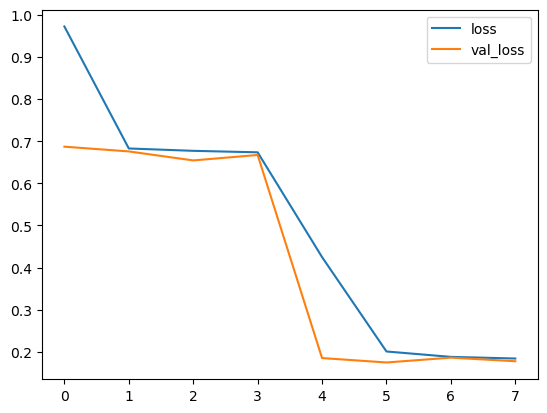

In [55]:
losses[['loss','val_loss']].plot()

In [56]:
model.metrics_names

['loss', 'compile_metrics']

In [58]:
model.evaluate(test_image_gen)

345/345 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.9503 - loss: 0.1347


[0.17535923421382904, 0.9432148337364197]

In [59]:
from tensorflow.keras.preprocessing import image

In [60]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict(test_image_gen)

345/345 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step


In [61]:
pred_probabilities

array([[7.5569205e-06],
       [6.0449161e-06],
       [6.7606829e-06],
       ...,
       [9.6668613e-01],
       [9.6673524e-01],
       [9.7703427e-01]], dtype=float32)

In [62]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [63]:
predictions = pred_probabilities > 0.5

In [64]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2756
           1       0.95      0.94      0.94      2756

    accuracy                           0.94      5512
   macro avg       0.94      0.94      0.94      5512
weighted avg       0.94      0.94      0.94      5512



In [67]:
confusion_matrix(test_image_gen.classes,predictions)

array([[2619,  137],
       [ 177, 2579]], dtype=int64)

# Predicting on an Image

In [68]:
# Your file path will be different!
para_cell

'C:\\Users\\kaizi\\Desktop\\Deep Learning\\cell_images\\train\\\\parasitized\\C33P1thinF_IMG_20150619_114756a_cell_179.png'

In [69]:
my_image = image.load_img(para_cell,target_size=image_shape)

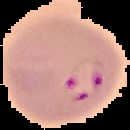

In [70]:
my_image

In [71]:
type(my_image)

PIL.Image.Image

In [72]:
my_image = image.img_to_array(my_image)

In [73]:
type(my_image)

numpy.ndarray

In [74]:
my_image.shape

(130, 130, 3)

In [75]:
my_image = np.expand_dims(my_image, axis=0)

In [76]:
my_image.shape

(1, 130, 130, 3)

In [77]:
model.predict(my_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[2.7644154e-10]], dtype=float32)

In [78]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}